# Задание №3

Необходимо исследовать следующие вопросы:

1) Направления смен тарифных планов: с каких тарифных планов и на какие шли  наибольшие перетоки? Визуализировать потоки миграций на диаграмме. 
2) Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.
3) Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from pandas. tseries.offsets import DateOffset

В файле **Tariff_plans_change.csv** содержатся выборочные данные о транзакциях, связанных с подключениями и отключениями тарифных планов абонентами, которые меняли тарифные планы в первом полугодии 2017 года: 
* SUBSCRIBER_ID	 -  условный идентификатор абонента
* TARIFF_PLAN_ID – условный идентификатор тарифного плана	
* START_DTTM	 - дата и время подключения плана
* END_DTTM – дата и время отключения (значение $null$ означает, что план актуален на текущий момент).

In [ ]:
plans = pd.read_csv('Задание_3\Tariff_plans_change.csv')
plans.head()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59


In [ ]:
plans.rename(columns = {'SUBSCRIBER_ID':'subscriber_id', 
                        'TARIFF_PLAN_ID':'tariff_plan_id', 
                        'START_DTTM':'start_dttm', 
                        'END_DTTM':'end_dttm'}, 
            inplace = True )

In [ ]:
plans.loc[plans["end_dttm"]=='$null$', "end_dttm"] = np.nan

In [ ]:
plans[['start_dttm', 'end_dttm']] = plans[['start_dttm', 'end_dttm']].apply(pd.to_datetime )

In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12344 entries, 0 to 12343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subscriber_id   12344 non-null  int64         
 1   tariff_plan_id  12344 non-null  int64         
 2   start_dttm      12344 non-null  datetime64[ns]
 3   end_dttm        6406 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 385.9 KB


В файле **Charges.csv** содержатся помесячные исторические данные об общих расходах абонентов на мобильную связь:
* SUBSCRIBER_ID	 -  условный идентификатор абонента
* BILL_MONTH – биллинговый период в формате YYYY-MM-01 (например, строки со значением ‘2016-01-01’ содержат данные о расходах и потреблении за январь 2016 года)
* CHARGES – общая сумма  счета за услуги связи

In [ ]:
charg = pd.read_csv('Задание_3\Charges.csv')
charg.head()

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [ ]:
charg.rename(columns = {'SUBSCRIBER_ID':'subscriber_id', 
                          'BILL_MONTH':'bill_month', 
                          'CHARGES':'charges'}, 
                inplace = True )

In [ ]:
charg['bill_month'] = pd.to_datetime(charg['bill_month'])

В файле **Suspended.csv** содержатся исторические данные о блокировках абонентов в транзакционной форме:
* SUBSCRIBER_ID	 -  условный идентификатор абонента
* START_DT - дата начала блокировки
* END_DT – дата окончания блокировки (значение $null$ означает, что абонент остается блокированным на текущий момент).

In [ ]:
suspended = pd.read_csv('Задание_3\Suspended.csv')
suspended.head()

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,$null$,Suspended
4,3302,2016-08-23,2016-09-07,Suspended


In [ ]:
suspended = suspended.drop(columns = 'STATUS')

In [ ]:
suspended.rename(columns = {'SUBSCRIBER_ID':'subscriber_id', 
                            'START_DT':'start_dt', 
                            'END_DT':'end_dt'}, 
                inplace = True )

In [ ]:
suspended.loc[suspended["end_dt"]=='$null$', "end_dt"] = np.nan

In [ ]:
suspended[['start_dt', 'end_dt']] = suspended[['start_dt', 'end_dt']].apply(pd.to_datetime )

In [ ]:
suspended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   subscriber_id  4063 non-null   int64         
 1   start_dt       4063 non-null   datetime64[ns]
 2   end_dt         3997 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 95.4 KB


## Вопрос 1.

Направления смен тарифных планов: с каких тарифных планов и на какие шли наибольшие перетоки? Визуализировать потоки миграций на диаграмме. 

In [ ]:
plans.head()

,subscriber_id,tariff_plan_id,start_dttm,end_dttm
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,NaT
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,NaT
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59


In [ ]:
plans.sort_values(by=['subscriber_id', 'start_dttm'], inplace=True)

In [ ]:
new_subscriber_id = plans.subscriber_id[1:].values.tolist()
new_subscriber_id.append(np.nan)
plans['new_subscriber_id'] = new_subscriber_id

In [ ]:
new_tariff_plan_id = plans.tariff_plan_id[1:].values.tolist()
new_tariff_plan_id.append(0)
plans['new_tariff_plan_id'] = new_tariff_plan_id
plans.loc[(plans.end_dttm.isnull())|(plans['new_subscriber_id']!=plans['subscriber_id']), 'new_tariff_plan_id'] = 0

In [ ]:
plans = plans.drop(columns='new_subscriber_id')

Посмотрим на распределение события смены плана во времени.

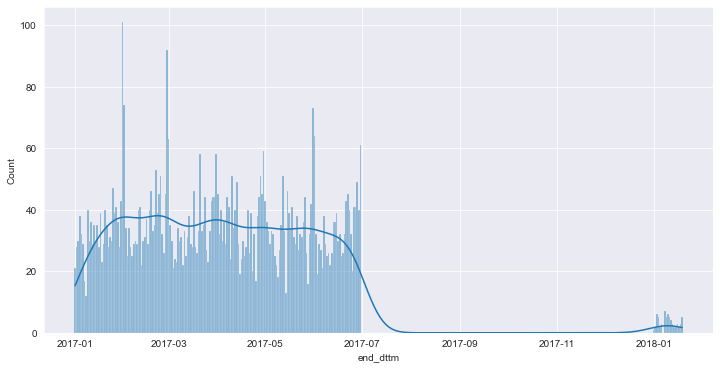

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(plans.end_dttm.dt.date, kde=True);

С каких тарифных планов были переходы.

tariff_plan_id
1    2059
2     609
3    2800
4     662
5     276
Name: end_dttm, dtype: int64


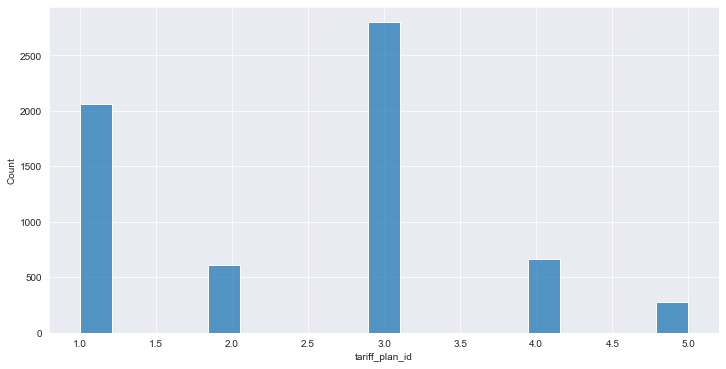

In [ ]:
print(plans.groupby('tariff_plan_id').end_dttm.count())
plt.figure(figsize=(12, 6))
sns.histplot(plans[plans.end_dttm.notnull()].tariff_plan_id, palette='Set3');

Больше всего уходили с тарифного плана с id 3 - 2800 раз. Далее id 1 - 2059, id 4 - 662, id 2 - 609, id 5 - 276.

На какие тарифные планы переходили.

new_tariff_plan_id
1     165
2      41
3     224
4     958
5    4952
Name: end_dttm, dtype: int64


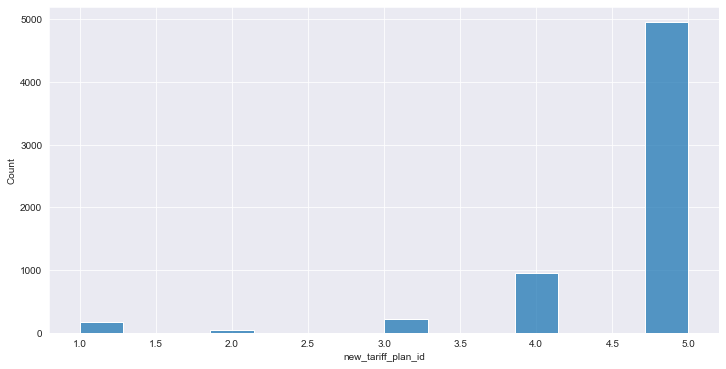

In [ ]:
print(plans[plans.new_tariff_plan_id!=0].groupby('new_tariff_plan_id').end_dttm.count())
plt.figure(figsize=(12, 6))
sns.histplot(plans[plans.new_tariff_plan_id!=0].new_tariff_plan_id);

Теперь посмотрим с каких на какие ТП переходили.

In [ ]:
plans['trans'] = plans.tariff_plan_id.apply(str) + ' to ' + plans.new_tariff_plan_id.apply(str)
plans.loc[plans.new_tariff_plan_id == 0, 'trans'] = np.nan

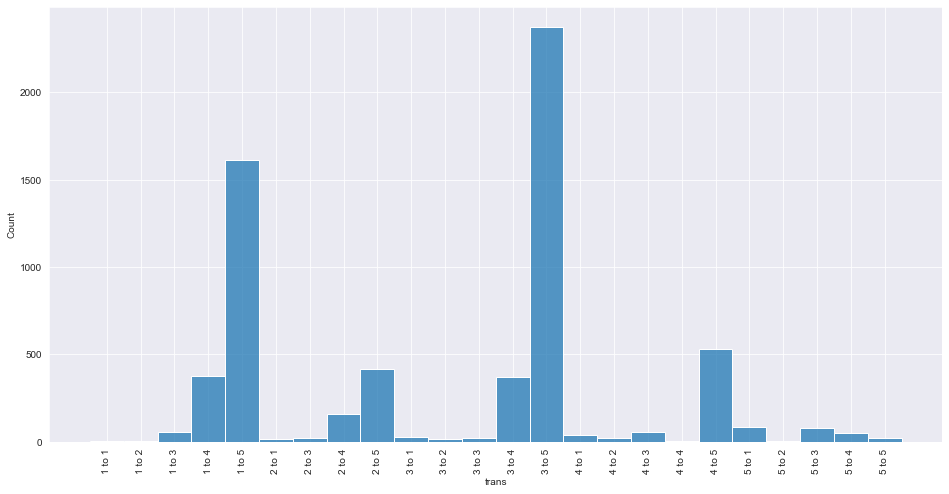

In [ ]:
#print(plans.groupby('trans').end_dttm.count())
plt.figure(figsize=(16, 8))
sns.histplot(plans.sort_values(by=['trans'])['trans'])
plt.xticks(rotation=90);

Cудя по столбчатой диаграмме - каждый последующий тарифный план лучше предыдущего.

## Вопрос 2.

Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

In [ ]:
plans.head()

,subscriber_id,tariff_plan_id,start_dttm,end_dttm,new_tariff_plan_id,trans
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,3,2 to 3
1,1,3,2017-03-11 14:24:18,NaT,0,NaN
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,5,1 to 5
3,2,5,2017-06-29 12:39:59,NaT,0,NaN
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,5,1 to 5


In [ ]:
plans['trans'] = plans['trans'].shift(1)

In [ ]:
plans['month'] = plans.start_dttm.dt.strftime('%Y-%m-01')
plans['month'] = pd.to_datetime(plans['month'])

In [ ]:
charg.head()

,subscriber_id,bill_month,charges
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [ ]:
charg.sort_values(by=['subscriber_id', 'bill_month'], inplace=True)

Выведем только дату перехода на другой тарифный план и сам переход.

In [ ]:
plans_only = plans[plans.trans.notnull()][['subscriber_id', 'month', 'trans']]
plans_only.head()

,subscriber_id,month,trans
1,1,2017-03-01,2 to 3
3,2,2017-06-01,1 to 5
5,3,2017-04-01,1 to 5
7,4,2017-01-01,3 to 5
9,5,2017-05-01,1 to 5


Добавим данные о средней сумме за последние 3 месяца до перехода и последующие 3 месяца после перехода.

In [ ]:
before, after = [], []

for _, row in plans_only.iterrows():
    before.append(charg[(charg.subscriber_id == row.subscriber_id) &
                          (charg.bill_month<row.month) &
                          (charg.bill_month >= (row.month - DateOffset(months=3)))].charges.mean())
    after.append(charg[(charg.subscriber_id == row.subscriber_id) &
                          (charg.bill_month>row.month) &
                          (charg.bill_month <= (row.month + DateOffset(months=3)))].charges.mean())

Добавим данные разности между затратами за последущие и предыдущие месяцы.

In [ ]:
plans_only['before'] = before
plans_only['after'] = after
plans_only['differ'] = plans_only['after'] - plans_only['before']
plans_only.head()

,subscriber_id,month,trans,before,after,differ
1,1,2017-03-01,2 to 3,23.086000,25.040333,1.954333
3,2,2017-06-01,1 to 5,5.591667,5.132000,-0.459667
5,3,2017-04-01,1 to 5,5.193000,4.997333,-0.195667
7,4,2017-01-01,3 to 5,6.670000,4.812000,-1.858000
9,5,2017-05-01,1 to 5,3.720333,4.788000,1.067667


In [ ]:
plans_only[plans_only.trans == t].groupby('month').differ.mean().index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01'],
              dtype='datetime64[ns]', name='month', freq=None)

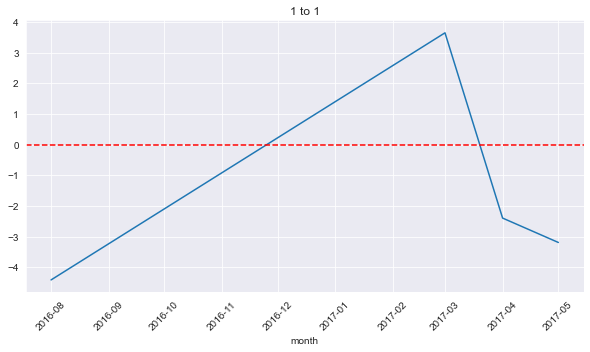

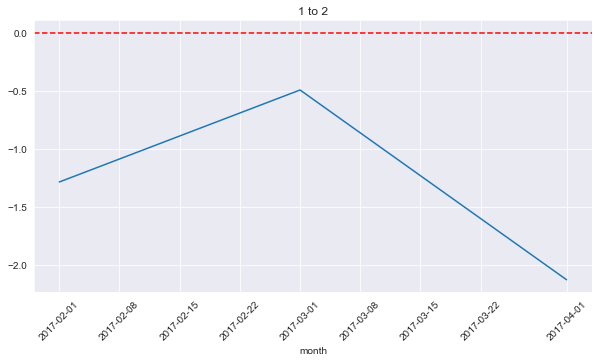

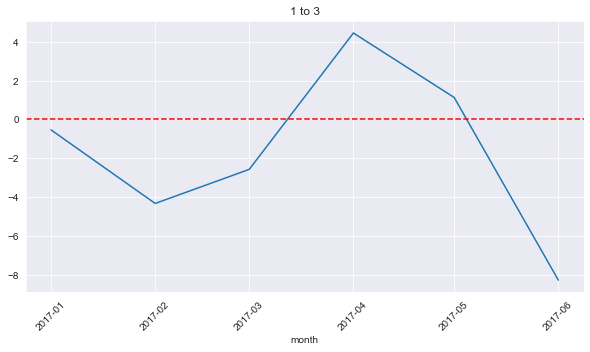

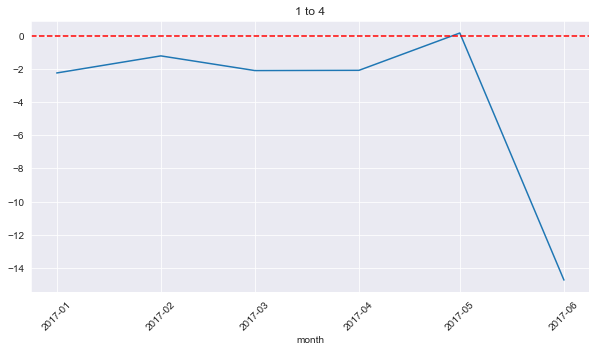

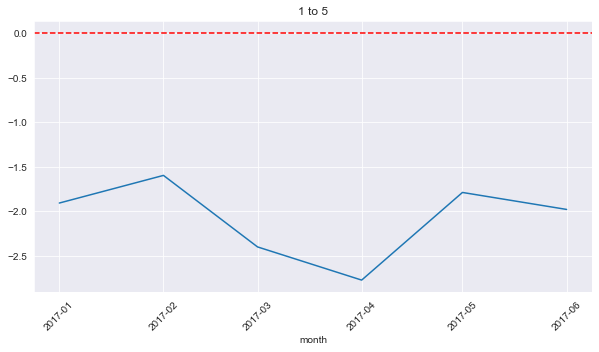

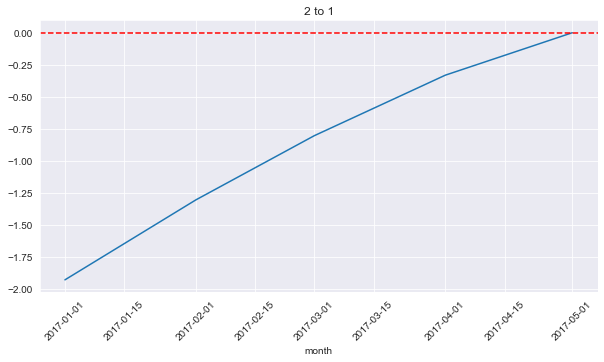

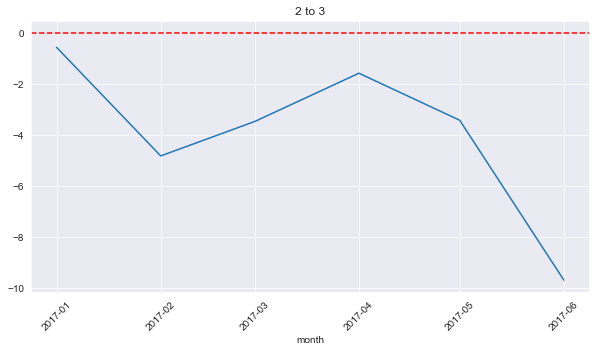

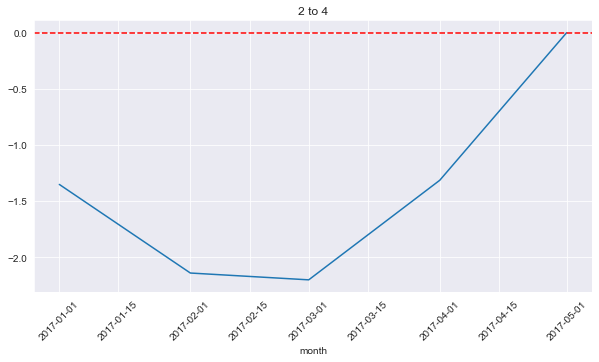

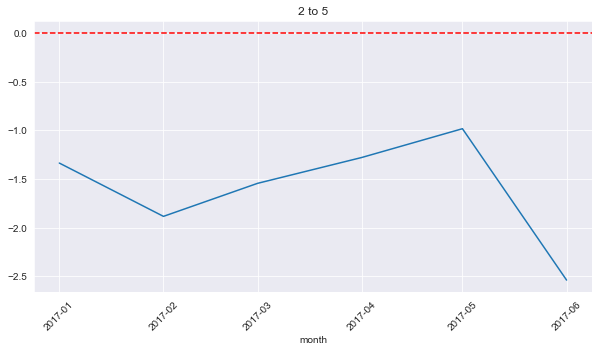

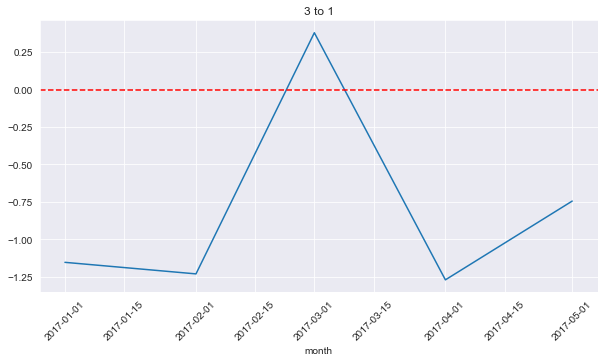

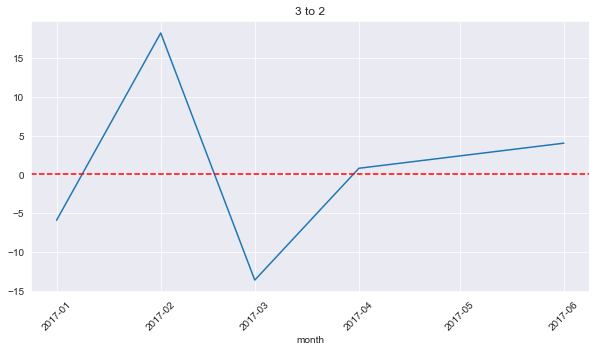

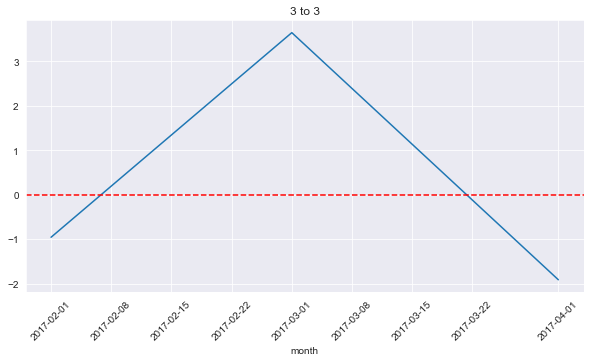

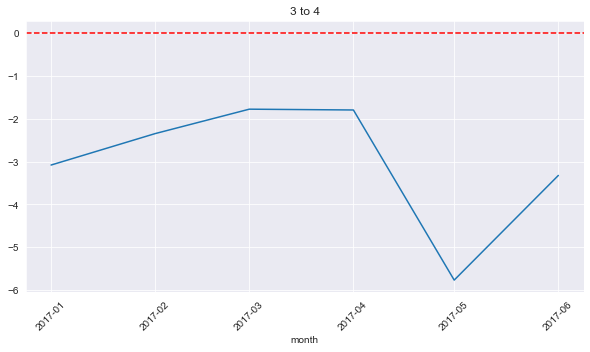

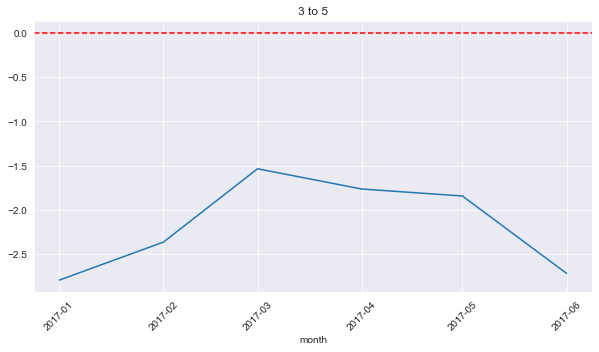

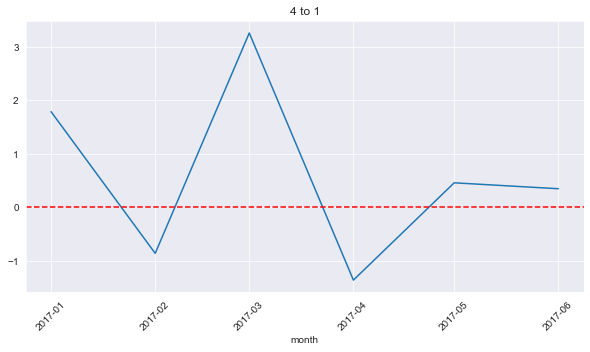

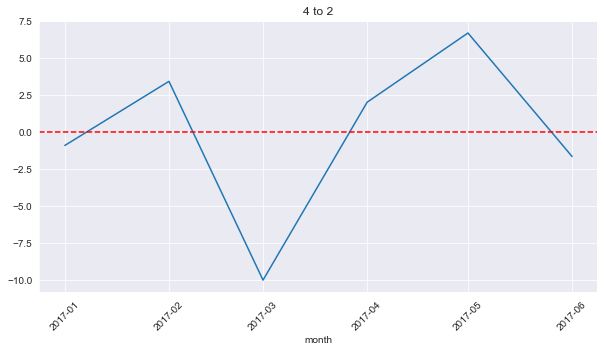

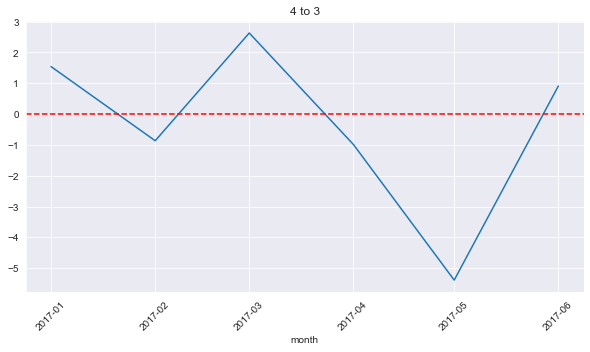

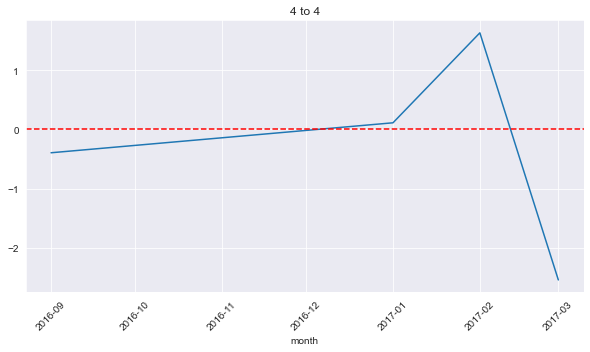

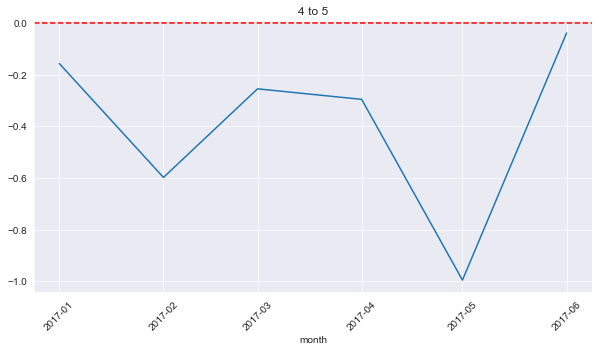

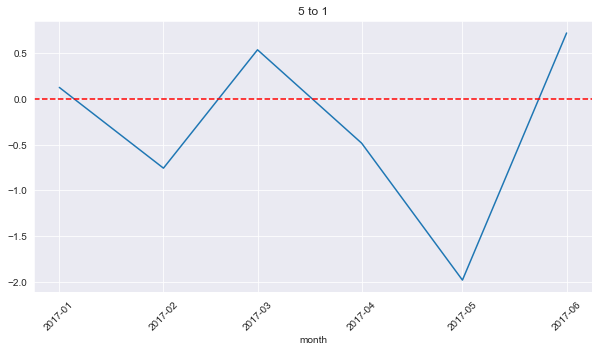

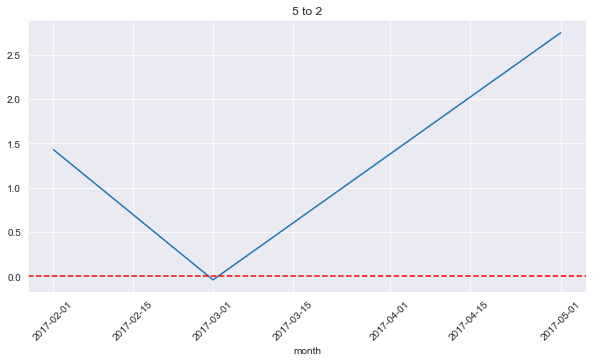

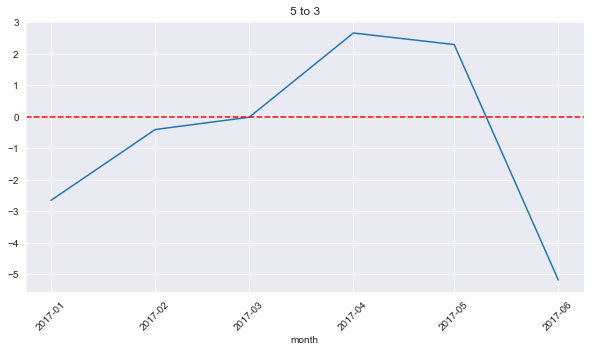

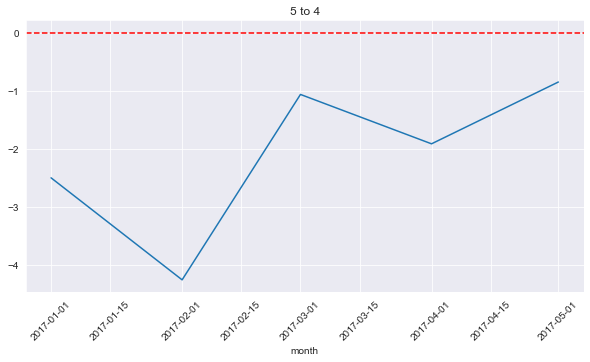

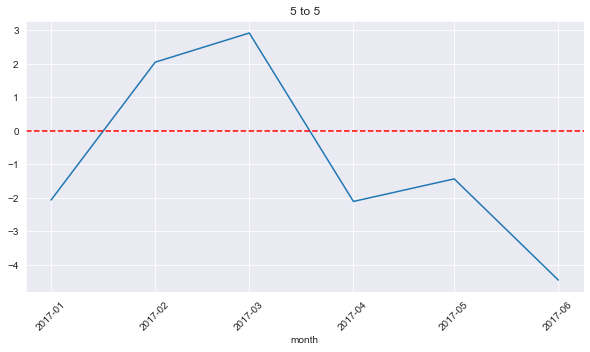

In [ ]:
for t in sorted(plans_only.trans.unique()):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x = plans_only[plans_only.trans == t].groupby('month').differ.mean().index,
                 y = plans_only[plans_only.trans == t].groupby('month').differ.mean().values)
    plt.axhline (y=0, color='red', linestyle='--')
    plt.title(t)
    plt.xticks(rotation=45)
    plt.show()

Как видно из графиков выше, в одном переходе могло быть и повышение и понижение среднего счёта. Так что будем использовать среднее значение по каждому из переходов.

Получим разницу средних затрат для каждого типа переходов.

In [ ]:
trans_diff = pd.DataFrame(plans_only.groupby('trans').differ.mean()) 
trans_diff.head()

,differ
trans,
1 to 1,-1.591583
1 to 2,-1.139267
1 to 3,-1.260509
1 to 4,-1.852773
1 to 5,-2.070950


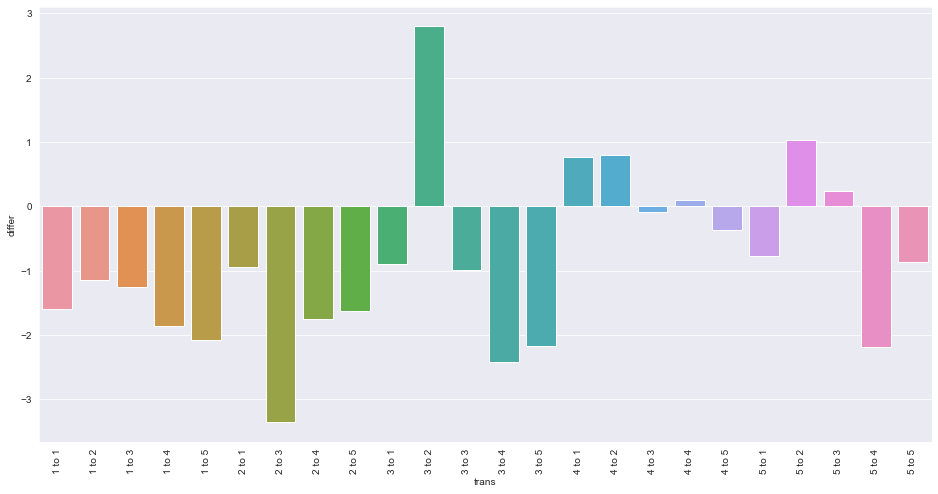

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x = trans_diff.index, y = trans_diff.differ)
plt.xticks(rotation=90);

Посмотрим общее изменение счёта:

In [ ]:
plans_only.differ.mean()

-1.8256943035299091

В среднем счёт становился меньше.

## Вопрос №3.

Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

In [ ]:
suspended.head()

,subscriber_id,start_dt,end_dt
0,5195,2017-12-27,2017-12-27
1,5198,2017-04-18,2017-04-18
2,381,2017-04-18,2017-04-20
3,3500,2017-12-21,NaT
4,3302,2016-08-23,2016-09-07


In [ ]:
suspended.sort_values(by=['subscriber_id', 'start_dt'], inplace=True)

In [ ]:
plans_only.head()

,subscriber_id,month,trans,before,after,differ
1,1,2017-03-01,2 to 3,23.086000,25.040333,1.954333
3,2,2017-06-01,1 to 5,5.591667,5.132000,-0.459667
5,3,2017-04-01,1 to 5,5.193000,4.997333,-0.195667
7,4,2017-01-01,3 to 5,6.670000,4.812000,-1.858000
9,5,2017-05-01,1 to 5,3.720333,4.788000,1.067667


In [ ]:
suspended_before, suspended_after = [], []

for _, row in plans_only.iterrows():
    suspended_before.append(suspended[(suspended.subscriber_id == row.subscriber_id) &
                                        (suspended.start_dt<row.month) &
                                        (suspended.start_dt >= (row.month - DateOffset(months=3)))].start_dt.count())
    suspended_after.append(suspended[(suspended.subscriber_id == row.subscriber_id) &
                                        (suspended.start_dt>row.month) &
                                        (suspended.start_dt <= (row.month + DateOffset(months=3)))].start_dt.count())

In [ ]:
plans_only['suspended_before'] = suspended_before
plans_only['suspended_after'] = suspended_after
plans_only['suspended_differ'] = plans_only['suspended_after'] - plans_only['suspended_before']
plans_only.head()

,subscriber_id,month,trans,before,after,differ,suspended_before,suspended_after,suspended_differ
1,1,2017-03-01,2 to 3,23.086000,25.040333,1.954333,0,0,0
3,2,2017-06-01,1 to 5,5.591667,5.132000,-0.459667,0,0,0
5,3,2017-04-01,1 to 5,5.193000,4.997333,-0.195667,0,0,0
7,4,2017-01-01,3 to 5,6.670000,4.812000,-1.858000,0,0,0
9,5,2017-05-01,1 to 5,3.720333,4.788000,1.067667,1,2,1


In [ ]:
suspended_diff = pd.DataFrame(plans_only.groupby('trans').suspended_differ.mean()) 
suspended_diff.head()

,suspended_differ
trans,
1 to 1,0.000000
1 to 2,0.400000
1 to 3,-0.018182
1 to 4,-0.015873
1 to 5,-0.021079


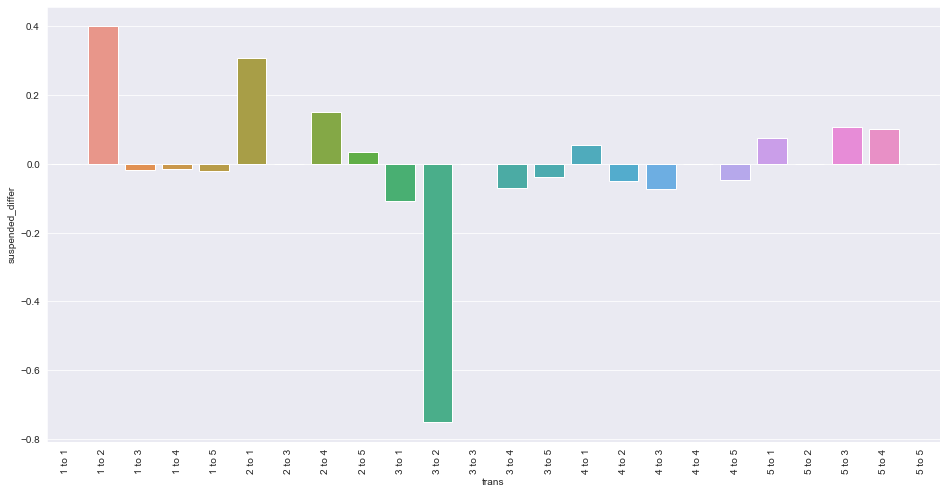

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x = suspended_diff.index, y = suspended_diff.suspended_differ)
plt.xticks(rotation=90);

Как видно сле перехода пользователи начали реже попадать в блок. Однако, при перехоле с 3 на 2 тариф, бокировать пользователей начинали чаще.  